<img src='http://www-scf.usc.edu/~ghasemig/images/sharif.png' alt="SUT logo" width=300 height=300 align=left class="saturate" >

<br>
<font>
<div dir=ltr align=center>
<font color=0F5298 size=7>
    Artificial Intelligence <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
    Spring 2023<br>
<font color=3C99D size=5>
    Practical Assignment 1 - Search <br>
<font color=696880 size=4>
    Mohammad Mahdi Abootorabi and Roozbeh Pirayadi 

____

# Personal Data

In [1]:
# Set your student number
student_number = '400104715'
Name = 'Ali'
Last_Name = 'Aghayari'

# source for A*  : https://stackabuse.com/courses/graphs-in-python-theory-and-implementation/lessons/a-star-search-algorithm/

# Rules
- Make sure that all of your cells can be run perfectly. 

# Q1: Elevator Ride (100 Points)

<font size=4>
Author: Roozbeh Pirayadi
			<br/>
                <font color=red>
Please run all the cells.
     </font>
</font>
                <br/>
    </div>

## Problem Definition

Computer Engineering department has two floors. There are N students and M professors on the first floor, all of whom, want to go from the first floor to the second floor. The only way to move from the first floor to the second one is by using an elevator. 

At most two people can fit in the elevator at the same time. Also, the elevator cannot operate by itself. This means that when the elevator moves up or down, there is either one person in the elevator or there are two people in it. 

But there is a problem. 
If in any of the mentioned floors, there are more students than proffesors, students will start asking questions from the professors. Professors are not willing to answer any question. So none of them wants to be in a floor where the number of students is more than the number of professors. Note that when there is no professor in the floor the number of students is not important. But when there is, the number of students must be less than or equal to the number of professors.

Our goal is to find a schedule for the people to get on the elevator so that this constraint is satisfied.

Below you can see a solution for 4 students and 4 professors

![SegmentLocal](images/result_of_5_3.gif "segment")

Every state in the discussed problem could be represented as a 5-tuple (s1, p1, s2, p2, e). Where s1 is the number of students in the first floor, p1 is the number of professors in the first floor, s2 is the number of students in the second floor and p2 is the number of professors in the second floor. Finally e shows which floor the elevator is.

Our goal is to find a feasible solution. we will do this by starting from the initial state and searching for the final state. Note that there may be more than one way to the final state so the solution is not unique.

## Solution

### Graph

Below is an implementation of a directed weighted graph. You don't need to change anything in this cell. Just take a look at the code, so you could use it.

In [2]:
###########################################
###### no need to change any thing ########
###########################################
class graph:
    def __init__(self):
        self.graph = {}
        self.visited = {}

    # add a new edge between v1 and v2 with weight w or update the weight if edge already exists
    def append(self, v1, v2, w):
        if v1 not in self.graph.keys():
            self.graph[v1] = {}
            self.visited[v1] = 0
        if v2 not in self.graph.keys():
            self.graph[v2] = {}
            self.visited[v2] = 0
        self.graph[v1][v2] = w

    # return adjacency list (used for debugging)
    def reveal(self):
        return self.graph

    # return all vertices in the graph
    def vertex(self):
        return list(self.graph.keys())

    # return all neighbours of a vertix as a list

    def neighbour(self, v):
        return list(self.graph[v].keys())

    # return the weight of a edge

    def weight(self, v1, v2):
        return (self.graph[v1][v2])

    # return the number of vertices

    def order(self):
        return len(self.graph)

    # visit a particular vertex
    def visit(self, v):
        self.visited[v] = 1

    # return the visit status of a particular vertex
    def is_visited(self, vertexid):
        return self.visited[vertexid]

    # return which vertices have been visited
    def get_visited(self):
        return self.visited

    # return degree of a particular vertex
    def degree(self, vertexid):
        return len(self.graph[vertexid])

    # unvisit the whole graph        if whole is True
    # unvisit a particular vertex    if whole is False
    def clear(self, v=None, whole=False):
        if whole:
            self.visited = dict(zip(self.graph.keys(), [0 for i in range(len(self.graph))]))
        elif v is not None:
            self.visited[v] = 0
        else:
            assert False, "arguments must satisfy whole=True or v not None"


#### Building the graph of states

Let's start by a little example and consider a situation where we there are 3 students and 3 professors. Note that your code should be written for the general case using the variables N and M.

In [3]:
# Number of Students
N = 3
# Number of Professors
M = 3

First let's implement a function that receives a 4-tuple (s1, p1, s2, p2) as an input and checks whether this state is a valid one or not. Note that e (position of the elevator) cannot affect the validity of a state so it is not provided as an input.

In [4]:
# validate a state (s1, p1, s2, p2)
# if the constraints are satisfied return true, else return false
def validate(input):
    s1, p1, s2, p2 = input
    if s1 < 0 or s2 < 0 or p1 < 0 or p2 < 0 : return False
    if s1 > p1 and p1 != 0: return False 
    if s2 > p2 and p2 != 0 : return False
    return True

The below function must build the whole graph. Each scenario is a vertex and v1 is connected to v2 with weight 1 if scenario in v1 could be changed to the scenario in v2 by only one traversal of the elevator.

Hint: you can iterate over different values of s1, p1 and e and determine s2 and p2 using N and M. Then you can check all different actions and use the validate function to determine whether taking this action is possible or not.

In [5]:
def create_possible_actions(N ,M ,s1 ,p1 ,e):
    res = [] 
    s2 = N - s1
    p2 = M - p1
    if e == 2 : 
        # elevator is up
        if validate((s1+1 ,p1 ,s2-1 ,p2)) : res.append([(s1 ,p1 ,s2 ,p2 ,2),(s1+1 ,p1 ,s2-1 ,p2 ,1)])
        if validate((s1+2 ,p1 ,s2-2 ,p2)) : res.append([(s1 ,p1 ,s2 ,p2 ,2),(s1+2 ,p1 ,s2-2 ,p2 ,1)])
        if validate((s1 ,p1+1 ,s2 ,p2-1)) : res.append([(s1 ,p1 ,s2 ,p2 ,2),(s1 ,p1+1 ,s2 ,p2-1 ,1)])
        if validate((s1 ,p1+2 ,s2 ,p2-2)) : res.append([(s1 ,p1 ,s2 ,p2 ,2),(s1 ,p1+2 ,s2 ,p2-2 ,1)])
        if validate((s1+1 ,p1+1 ,s2-1 ,p2-1)) : res.append([(s1 ,p1 ,s2 ,p2 ,2),(s1+1 ,p1+1 ,s2-1 ,p2-1 ,1)])
    elif e == 1 :
        # elevator is down
        if validate((s1-1 ,p1 ,s2+1 ,p2)) : res.append([(s1 ,p1 ,s2 ,p2 ,1),(s1-1 ,p1 ,s2+1 ,p2 ,2)])
        if validate((s1-2 ,p1 ,s2+2 ,p2)) : res.append([(s1 ,p1 ,s2 ,p2 ,1),(s1-2 ,p1 ,s2+2 ,p2 ,2)])
        if validate((s1 ,p1-1 ,s2 ,p2+1)) : res.append([(s1 ,p1 ,s2 ,p2 ,1),(s1 ,p1-1 ,s2 ,p2+1 ,2)])
        if validate((s1 ,p1-2 ,s2 ,p2+2)) : res.append([(s1 ,p1 ,s2 ,p2 ,1),(s1 ,p1-2 ,s2 ,p2+2 ,2)])
        if validate((s1-1 ,p1-1 ,s2+1 ,p2+1)) : res.append([(s1 ,p1 ,s2 ,p2 ,1),(s1-1 ,p1-1 ,s2+1 ,p2+1 ,2)])
        
    return res 
# builds the complete graph
def build_graph(N, M):
    G = graph()
    for i in range(N + 1):
        for j in range(M + 1):
            if not validate((i ,j ,N-i ,M-j)) : continue 
            for e in range(1,3):
                for states in create_possible_actions(N ,M ,i ,j ,e):
                    G.append(tuple(states[0]) ,tuple(states[1]) , 1)
    return G


In [6]:
G = build_graph(N, M)

### Depth First Search

The first algorithm we use to solve the problem is Depth First Search. The function below  executes DFS on G from start until it reaches end. Note that if end is not reachable from start this function returns false and otherwise it returns the found path as a list of states. DFS code is completely and it is used as a baseline to evaulute your A* implementation in the next part.

In [7]:
###########################################
###### no need to change any thing ########
###########################################
# Depth First Search to find the path from start to end
def run_dfs(G, start, end):
    queue = []
    queue.append(start)

    # pred keeps track of how we got to the current vertex
    pred = {}

    while queue:
        current = queue.pop(0)
        G.visit(current)

        smallq = []

        # find children and add to the priority
        for newpos in G.neighbour(current):
            if not G.is_visited(newpos):
                # if the child vertex has already been in queue
                # move it to the frontline of queue
                if newpos in queue:
                    queue.remove(newpos)
                smallq.append(newpos)
                pred[newpos] = current

        queue = smallq+queue

        # traversal ends when the target is met
        if current == end:
            break

    if current != end:
        return False

    # create the path by backtracking
    # trace the predecessor vertex from end to start
    previous = end
    path = []
    while pred:
        path.insert(0, previous)
        if previous == start:
            break
        previous = pred[previous]

    return path


In [8]:
start_vertex = (N, M, 0, 0, 1)
end_vertex = (0, 0, N, M, 2)

In [9]:
###########################################
###### no need to change any thing ########
###########################################
def dfs_result(G, start_vertex, end_vertex):

    dfs_path = run_dfs(G, start_vertex, end_vertex)

    num_of_visited_dfs = 0
    num_of_visited_dfs = len([i for i in G.get_visited() if G.get_visited()[i] == 1])

    G.clear(whole=True)

    if not dfs_path:
        print("end vertex not reachable")
    else:
        print(f'length of the path DFS has found:', len(dfs_path) - 1)

    print(f'number of vertices DFS has traveled:', num_of_visited_dfs)


dfs_result(G, start_vertex, end_vertex)


length of the path DFS has found: 11
number of vertices DFS has traveled: 13


### A* Algorithm

Next we use the A* algorithm. To use A* we need to propose a heuristic function. Propose a non-trivial heuristic function and argue that it is admissible. (10 Points)



<font color='blue'>

$$
 h((s1, p1, s2, p2, e)) = 2 * (s1 + p1) + e - 2
$$

every one needs to get to the second floor , so we need our function to calculate the lowerbound of steps to get everyone from current state to second floor. </br>
-->when elevator is up : we cant do anything but making the situation worse ! (getting far 1-2 steps from goal) </br>
-->when elevator is down : we can make the situation a little better by getting one or two people to the second floor (getting close 1-2 steps to the goal)
so if we define a heuristic function as : "amount of people in first floor * 2 - 3" we will have a admissible heuristic function 
because when elevator is down our best move will make us 2 steps closer and when the elevator is down our best move will make us 1 step farther --> we will group these two situations --> so in every group action we will make our situation better by 1 step (at best!) so we can define "h" as "amount of people that need to get to the higher floor * 2 - 3" , in this case we need a single group action for every one except the last 2 , for explaining this i will bring a example </br>
let s1 + p1 = 5 </br>
 1 - 1 group action -> 2 actions -> s1 + p1 = 4 (at best !) </br>
 2 - 1 group action -> 2 actions -> s1 + p1 = 3 (at best !) </br>
 3 - 1 group action -> 2 actions -> s1 + p1 = 2 (at best !) "this last step is the reason we are reducing "h" by 2"</br>
 4 - now ----because we dont need to go up and down (at best)--> 1 action -> s1 + p1 = 0 </br>
 done !  </br>
 actions count = 2 * (s1 + p1) - 2  </br>
 as we know , we took the best case in every step ---so we will have--> h <= h*
                                                                             
in calculation above i let "e" to be 1 , but what if e = 2 --> then "at best" we will get one step farther from goal 
    so --> h = 2 * (s1 + p1) + e - 2
we can get rid of "e" for simplicity 

</font>



In [10]:
def heuristic_func(input):
    s1, p1, s2, p2, e = input
    return 2 * ( s1 + p1 ) + e - 2


Like DFS if end is not reachable from start A* must return false and otherwise it must return the found path as a list of states.

In [11]:
# A* to find the path from start to end
def run_a_star(G, start, end):
    opened = set()
    opened.add(start)
    closed = set()
    g = {}
    parents = {}
    g[start] = 0
    parents[start] = start
    while opened:
        n = None
        for v in opened: 
            if n == None or g[v] + heuristic_func(v) < g[n] + heuristic_func(n):
                n = v
        #print(g[n] +  heuristic_func(n))
        #print(n)
        if n == None : return False
        if n == end :  
            path = []
            while parents[n] != n :
                path.append(n)
                n = parents[n]
            path.append(start)
            path.reverse()
            return path
        for neighbour in G.neighbour(n):
            if (neighbour not in opened) and (neighbour not in closed) :
                opened.add(neighbour)
                g[neighbour] = g[n] + heuristic_func(n) + 1
                parents[neighbour] = n
            else :
                if g[neighbour] > g[n] + heuristic_func(n) + 1 :
                    g[neighbour] = g[n] + heuristic_func(n) + 1
                    parents[neighbour] = n
                    if neighbour in closed :
                            closed.remove(neighbour)
                            opened.add(neighbour) 
        G.visit(n)
        opened.remove(n)
        closed.add(n)
    return False

In [12]:
###########################################
###### no need to change any thing ########
###########################################
def a_star_result(G, start_vertex, end_vertex):
    a_star_path = run_a_star(G, start_vertex, end_vertex)

    num_of_visited_a_star = 0
    num_of_visited_a_star = len([i for i in G.get_visited() if G.get_visited()[i] == 1])

    G.clear(whole=True)

    if not a_star_path:
        print("end vertex not reachable")
    else:
        print(f'length of the path A* has found:', len(a_star_path) - 1)

    print(f'number of vertices A* has traveled:', num_of_visited_a_star)

a_star_result(G, start_vertex, end_vertex)

length of the path A* has found: 11
number of vertices A* has traveled: 14


## Visualization

The below code creates a gif named "result.gif" which shows the result found by A* algorithm.

MovieWriter ffmpeg unavailable; using Pillow instead.


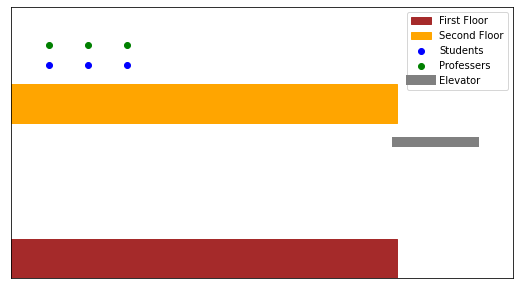

In [13]:
import drawer
drawer.create_gif(run_a_star(G, start_vertex, end_vertex))
G.clear(whole=True)

## Results

Now results of DFS and A* could be compared. Run the code below and explain the result. (10 Points)

In [14]:
N = 100
M = 140

start_vertex = (N, M, 0, 0, 1)
end_vertex = (0, 0, N, M, 2)

G = build_graph(N, M)

dfs_result(G, start_vertex, end_vertex)
a_star_result(G, start_vertex, end_vertex)


length of the path DFS has found: 749
number of vertices DFS has traveled: 946
length of the path A* has found: 477
number of vertices A* has traveled: 8482


<font color='blue'>

in A* algorithm we are finding the best route , but in dfs we are just finding a valid route. </br>
so in A* we will have a larger time complexity but a better result !   

</font>

Cell below runs some tests on dfs and stores the results in "student_number.txt". Then run the cell and upload the result on Quera.

In [15]:
tests = [(100, 140), (200, 260), (600, 610) , (800, 1000)]

f = open(student_number + ".txt", "w")



def run_tests():
    for test in tests:
        N, M = test
        G = graph()
        start_vertex = (N, M, 0, 0, 1)
        end_vertex = (0, 0, N, M, 2)

        G = build_graph(N, M)

        f.write(str(run_a_star(G, start_vertex, end_vertex)))
        G.clear(whole=True)

    f.close()


run_tests()
